Name: Muhammad Rizky
Program: DBS Program

**Sistem Rekomendasi Aplikasi di Shopify App Store Berbasis Konten**

Proyek ini bertujuan untuk membangun sistem rekomendasi aplikasi yang dapat memberikan saran aplikasi serupa kepada pengguna berdasarkan konten teks pada aplikasi di Shopify App Store. Dengan memberikan rekomendasi aplikasi yang sesuai, sistem ini diharapkan dapat meningkatkan kepuasan pengguna dalam memilih aplikasi yang tepat untuk kebutuhan bisnis mereka.

**Problem Domain**

Sistem rekomendasi harus berfokus pada optimalisasi pencarian dan pemilihan aplikasi oleh pengguna. Dengan ribuan aplikasi yang tersedia, pengguna sering kali kesulitan menemukan aplikasi yang sesuai untuk kebutuhan bisnis mereka. Sistem rekomendasi berbasis konten ini bertujuan untuk mempermudah proses tersebut dengan menyarankan aplikasi serupa berdasarkan deskripsi dan fitur utama. Dengan demikian, sistem ini dapat meningkatkan pengalaman pengguna di Shopify App Store dan membantu mereka menemukan aplikasi yang paling relevan secara lebih efisien.

**Business Understanding**

Bisnis dari proyek ini adalah untuk meningkatkan pengalaman pengguna dalam mencari aplikasi di Shopify App Store melalui sistem rekomendasi berbasis konten. Dengan menyarankan aplikasi serupa yang relevan berdasarkan deskripsi dan fitur aplikasi, sistem ini dapat membantu pengguna menemukan aplikasi yang sesuai dengan kebutuhan mereka dengan lebih cepat dan mudah. Dampak positif dari sistem rekomendasi ini meliputi peningkatan kepuasan pengguna, waktu pencarian yang lebih efisien, dan kemungkinan konversi yang lebih tinggi bagi aplikasi yang disarankan.


**Import Package Libarray**

In [2]:
!pip install kaggle
#Libarary untuk upload File
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split for collaborative filtering
from sklearn.model_selection import train_test_split
# Handle text-based features for Content-Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrizky102356","key":"85af409ebff1292e0f00a1b8d1eebe89"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d r usernam3/shopify-app-store
!unzip shopify-app-store.zip

Dataset URL: https://www.kaggle.com/datasets/usernam3/shopify-app-store
License(s): other
 91% 65.0M/71.2M [00:00<00:00, 83.9MB/s]
100% 71.2M/71.2M [00:00<00:00, 87.1MB/s]
Archive:  shopify-app-store.zip
  inflating: apps.csv                
  inflating: apps_categories.csv     
  inflating: categories.csv          
  inflating: key_benefits.csv        
  inflating: pricing_plan_features.csv  
  inflating: pricing_plans.csv       
  inflating: reviews.csv             


**Data Understanding**

Tahapan ini untuk memahami struktur data yang ada di dataset

In [6]:
import pandas as pd

# Membaca dataset aplikasi
df_apps = pd.read_csv("apps.csv")

# Melihat beberapa baris dari dataset
df_apps.head()


,id,url,title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint,lastmod
0,afbe525f-d512-4951-8edc-582df3ce6aa7,https://apps.shopify.com/jewelexchange_feed,JewelExchange Product Feed API,Avalon Solution,https://apps.shopify.com/partners/avalon-solution,https://cdn.shopify.com/app-store/listing_imag...,0.0,0,"<div class=""block vc-app-listing-about-section...",JewelExchange is a cloud-based platform for Je...,"Connecting Retailers & Suppliers (Jewelry, Wat...",Free to install. Additional charges may apply.,2022-05-09
1,9594ccfa-9ef9-42a2-823c-e270489bcb88,https://apps.shopify.com/cocon-app,"COCON ‑ Emails, Popup",COCON SA,https://apps.shopify.com/partners/cocon-sa,https://cdn.shopify.com/app-store/listing_imag...,5.0,3,"<div class=""block vc-app-listing-about-section...",What is COCON? \n\n Set up in less than 15 min...,"Email Marketing, Popup, Automation, Analytics",Free plan available. 14-day free trial. Additi...,2022-06-04
2,cd229797-5798-4465-a313-2e27ce44e01d,https://apps.shopify.com/quantify,Quantify,Akuna Technologies,https://apps.shopify.com/partners/shopifytech,https://cdn.shopify.com/app-store/listing_imag...,3.3,14,"<div class=""block vc-app-listing-about-section...",Setting minimum and maximum quantities in your...,Setting Min-Max Quantities now made Easy,$3.99/month. 7-day free trial.,2022-05-19
3,6e07c6c8-8617-43d2-9a88-bafcbfe82f7f,https://apps.shopify.com/orderlyprint,OrderlyPrint,FORSBERG+two ApS,https://apps.shopify.com/partners/forsberg-two,https://cdn.shopify.com/app-store/listing_imag...,4.9,124,"<div class=""block vc-app-listing-about-section...","OrderlyPrint helps with your pick lists, packi...","Pick, pack, invoice, fulfill & export your ord...",From $29/month. 15-day free trial.,2022-05-19
4,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,SMSBump Ltd,https://apps.shopify.com/partners/isenselabs,https://cdn.shopify.com/app-store/listing_imag...,4.8,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13


In [7]:
# Mengetahui informasi dataset
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7341 non-null   object 
 1   url              7341 non-null   object 
 2   title            7341 non-null   object 
 3   developer        7341 non-null   object 
 4   developer_link   7341 non-null   object 
 5   icon             7341 non-null   object 
 6   rating           7341 non-null   float64
 7   reviews_count    7341 non-null   int64  
 8   description_raw  7341 non-null   object 
 9   description      7341 non-null   object 
 10  tagline          7341 non-null   object 
 11  pricing_hint     7341 non-null   object 
 12  lastmod          7341 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 745.7+ KB


In [8]:
# Melihat statistik deskriptif
df_apps.describe()

,rating,reviews_count
count,7341.000000,7341.000000
mean,3.035581,87.280616
std,2.188610,521.280600
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.400000,3.000000
75%,5.000000,24.000000
max,5.000000,24780.000000


In [9]:
# Menampilkan jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_apps.shape
print("Jumlah data (baris):", jumlah_baris)
print("Jumlah fitur (kolom):", jumlah_kolom)


Jumlah data (baris): 7341
Jumlah fitur (kolom): 13


In [10]:
#Mengecheck data duplikat
data_duplicate = df_apps.duplicated().sum()
if data_duplicate > 0:
  print(f"Jumlah data duplikat {data_duplicate}")
else:
  print("Tidak ada data duplikat")

Tidak ada data duplikat


In [11]:
missing_values = df_apps.isnull().sum()
total_missing = missing_values.sum()

if total_missing > 0:
  print(f"Jumlah data yang hilang: {total_missing}")
else:
  print("Tidak ada missing value")

Tidak ada missing value


**Univariate Exploratory Data Analysis**

Analisis ini bertujuan untuk memahami distribusi variabel tertentu seperti rating dan reviews_count. Anda dapat menggunakan sns.histplot() untuk melihat pola distribusi data.

Distribusi Berdasarkan Rating: Menunjukkan sebaran rating aplikasi yang diulas, memberi gambaran tentang kualitas rata-rata aplikasi di platform Shopify.

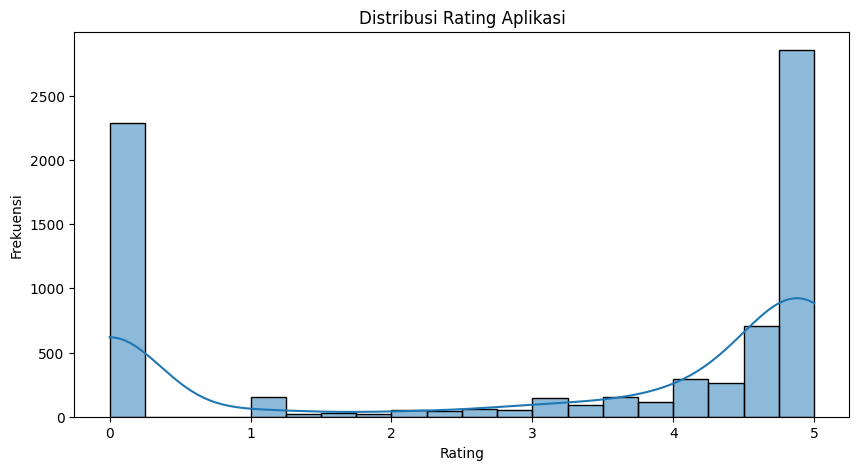

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi rating
plt.figure(figsize=(10, 5))
sns.histplot(df_apps['rating'], bins=20, kde=True)
plt.title('Distribusi Rating Aplikasi')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.savefig('distribusi_rating.png')
plt.show()


Distribusi Berdasarkan Jumlah Ulasan: Distribusi ulasan membantu mengidentifikasi aplikasi yang paling populer berdasarkan interaksi pengguna.

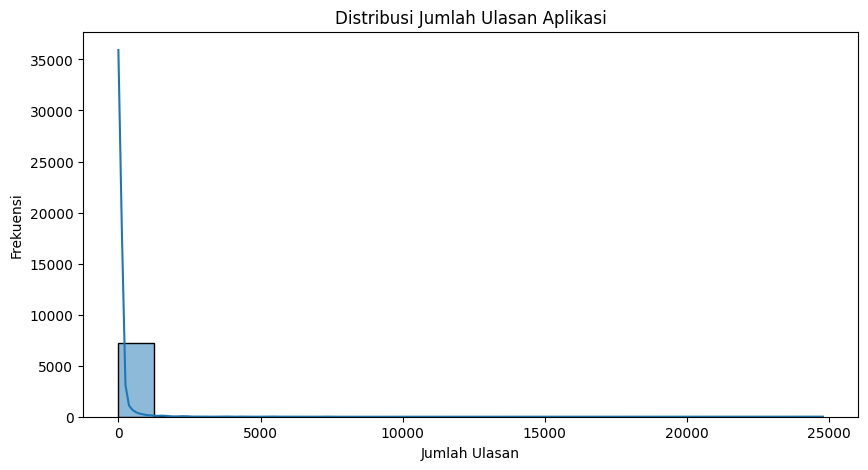

In [13]:

# Visualisasi jumlah ulasan
plt.figure(figsize=(10, 5))
sns.histplot(df_apps['reviews_count'], bins=20, kde=True)
plt.title('Distribusi Jumlah Ulasan Aplikasi')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi')
plt.savefig('distribusi_ulasan.png')
plt.show()


**Insight dari EDA**


Sebagian besar produk memiliki rating di atas 3, menandakan bahwa produk memiliki reputasi yang baik.
Produk dengan ulasan terbanyak cenderung populer dan dapat dijadikan bahan rekomendasi.


**Data Preparation**

Tahapan Data Preprocessing untuk menangani nilai hilang dan menghapus data duplikat. Menangani nilai yang hilang bisa dengan rata-rata atau median.

In [14]:
# Menangani nilai yang hilang
df_apps.fillna({'rating': df_apps['rating'].mean()}, inplace=True)# Mengisi nilai hilang pada rating dengan rata-rata

# Memeriksa nilai duplikat
df_apps.drop_duplicates(subset='title', keep='first', inplace=True)


Pada tahap ini, Anda akan menggabungkan kolom teks yang relevan, seperti title, description, dan tagline menjadi satu kolom content untuk representasi yang lebih kaya.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Membuat Kolom Konten
df_apps['content'] = df_apps['title'] + " " + df_apps['description'] + " " + df_apps['tagline']

# 2. Text Preprocessing dan Vectorization
vector = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.9, min_df=0.2)
matrix_vector = vector.fit_transform(df_apps['content'])


**Model Development**

Tahap modeling di sini menggunakan cosine_similarity untuk mengukur kesamaan antar aplikasi berdasarkan teks content. Fungsi rekomendasi mencari aplikasi-aplikasi yang paling mirip dengan input.

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
# 3. Menghitung Cosine Similarity
cosine_sim = cosine_similarity(matrix_vector, matrix_vector)

# 4. Fungsi Rekomendasi
def recommend_apps(app_title, cosine_sim=cosine_sim, df_apps=df_apps):
    try:
        # Mendapatkan index aplikasi berdasarkan judul
        app_title = df_apps[df_apps['title'] == app_title].index[0]

        # Mendapatkan skor similarity untuk semua aplikasi
        sim_scores = list(enumerate(cosine_sim[app_title]))

        # Mengurutkan aplikasi berdasarkan skor similarity
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Mengambil aplikasi dengan similarity tertinggi (kecuali aplikasi itu sendiri)
        sim_scores = sim_scores[1:12]  # Ambil 10 teratas

        # Mendapatkan judul aplikasi yang mirip
        title_similirarity = [i[0] for i in sim_scores]
        simililarity_scores = [round(i[1] * 100, 2) for i in sim_scores]

        recommended_apps = pd.DataFrame({
            'judul': df_apps['title'].iloc[title_similirarity].values,
            'Kemiripan (%)': simililarity_scores
        })
        print("Daftar Rekomendasi Produk Berdasarkan Kemiripan\n")
        print(recommended_apps.to_markdown(index=False))
        # Mengembalikan rekomendasi judul aplikasi
        return recommended_apps
    except IndexError:
        return "Tidak Memiliki Rekomendasi"


**Model Result**

menampilkan hasil rekomendasi beserta kemiripannya  dengan model yang telah di buat

In [17]:
#Penggunaan
recommend_app = 'JewelExchange Product Feed API'
recommendations = recommend_apps(recommend_app)


Daftar Rekomendasi Produk Berdasarkan Kemiripan

| judul                         |   Kemiripan (%) |
|:------------------------------|----------------:|
| Search Veil                   |           83.86 |
| Affiliate Product Feed        |           82.82 |
| Feeds Bridge                  |           78.68 |
| Auto Hide Sold‑out Products   |           78.56 |
| Nostock‑Noshow                |           78.44 |
| IconEcom: Print On Demand     |           77.74 |
| Push Down & Hide Out of Stock |           76.49 |
| Simple Bulk Price Editor      |           76.37 |
| Ablestar Bulk Product Editor  |           75.13 |
| Nada: Sort & Hide Sold‑out    |           74.71 |
| Blog Linker                   |           73.88 |


**Evaluation Model dengan matrix Precision at K, Recall at K**

precision at k: Menghitung berapa banyak rekomendasi yang relevan di antara K rekomendasi teratas, dinyatakan dalam persen.
recall at k: Menghitung berapa banyak item relevan yang ter-rekomendasi di antara K rekomendasi teratas terhadap total item relevan, juga dalam bentuk persen.

In [18]:
# Precision at K Function
def precision_at_k(recommendations, relate_apps, k=5):
    precision_recommend = recommendations['judul'].head(k).tolist()
    precision_relevant = len([app for app in precision_recommend if app in relate_apps])
    return (precision_relevant / k) * 100

def recall_at_k(recommendations, relate_apps, k=10):
    recall_recommend = recommendations['judul'].head(k).tolist()
    recall_relevant = len([app for app in recall_recommend if app in relate_apps])
    return (recall_relevant / len(relate_apps)) * 100


# Mendapatkan rekomendasi
data_recommend = recommend_apps(recommend_app)

# Menentukan relate_apps otomatis berdasarkan ambang batas kemiripan 75%
similarity_threshold = 75
actual_relate_app = data_recommend[data_recommend['Kemiripan (%)'] >= similarity_threshold]['judul'].tolist()

# Menghitung Precision@K dan Recall@K
precision_percent = precision_at_k(data_recommend, actual_relate_app, k=5)
recall_percent = recall_at_k(data_recommend, actual_relate_app, k=5)

print(f"Precision at 5: {precision_percent:.2f}%")
print(f"Recall at 5: {recall_percent:.2f}%")

Daftar Rekomendasi Produk Berdasarkan Kemiripan

| judul                         |   Kemiripan (%) |
|:------------------------------|----------------:|
| Search Veil                   |           83.86 |
| Affiliate Product Feed        |           82.82 |
| Feeds Bridge                  |           78.68 |
| Auto Hide Sold‑out Products   |           78.56 |
| Nostock‑Noshow                |           78.44 |
| IconEcom: Print On Demand     |           77.74 |
| Push Down & Hide Out of Stock |           76.49 |
| Simple Bulk Price Editor      |           76.37 |
| Ablestar Bulk Product Editor  |           75.13 |
| Nada: Sort & Hide Sold‑out    |           74.71 |
| Blog Linker                   |           73.88 |
Precision at 5: 100.00%
Recall at 5: 55.56%


**Kesimpuulan**

Kesimpulan dari proyek sistem rekomendasi aplikasi Shopify ini menunjukkan bahwa pendekatan berbasis konten dapat secara efektif mengidentifikasi aplikasi yang memiliki kesamaan fitur atau fungsi yang tinggi, sesuai dengan kebutuhan pengguna. Dengan menghitung kemiripan menggunakan Cosine Similarity, sistem ini mampu memberikan daftar rekomendasi aplikasi dengan tingkat kemiripan tertentu, membantu pengguna menemukan aplikasi yang relevan tanpa harus mencari secara manual. Evaluasi yang dilakukan melalui metrik precision dan recall menunjukkan seberapa baik model ini dalam merekomendasikan aplikasi yang benar-benar relevan, meskipun tantangan seperti ketersediaan data perilaku pengguna tetap menjadi keterbatasan.